# Factors affecting campus placement

This is a small and clean dataset of campus placement data.

As this data is clean, the preprocesing taks is simple.

The purpose of this project is to practice a classification preiction model using XGBoost

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("~/Documents/DataScienceClone/myProjects/DataSets/factors-affecting-campus-placement/Placement_Data_Full_Class.csv")
print(df.head(10)) 

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   
5      6      M  55.00   Others  49.80   Others   Science     67.25   
6      7      F  46.00   Others  49.20   Others  Commerce     79.00   
7      8      M  82.00  Central  64.00  Central   Science     66.00   
8      9      M  73.00  Central  79.00  Central  Commerce     72.00   
9     10      M  58.00  Central  70.00  Central  Commerce     61.00   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No    55.00         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes    86.50        Mkt&Fin  66.28      Placed  2000

In [2]:
df.shape

(215, 15)

In [3]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [4]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


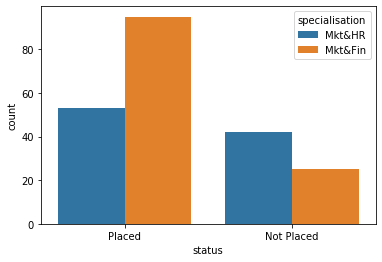

In [6]:
sns.countplot(x='status', data=df, hue='specialisation' )
plt.show()

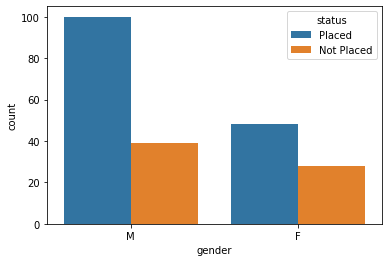

In [7]:
sns.countplot(x='gender', data=df, hue='status')

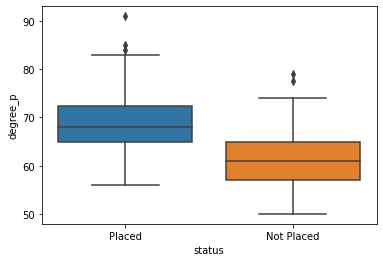

In [8]:
sns.boxplot(x='status', y='degree_p', data=df)
plt.show()

# Data Preprocessing

In [9]:
# Dropping bad predictors
df = df.drop(['sl_no','salary',], axis=1)

In [10]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [12]:
# Xgboost doesn't woerk with string data type, so I'll encode them using the get_dummies function of pandas
X = df.drop('status', axis=1)
y= df[['status']]
print(y)
X = pd.get_dummies(X)
y['status'] = y['status'].apply(lambda x: 0 if x == 'Not Placed' else 1)
print(X.info())

         status
0        Placed
1        Placed
2        Placed
3    Not Placed
4        Placed
..          ...
210      Placed
211      Placed
212      Placed
213      Placed
214  Not Placed

[215 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 21 columns):
ssc_p                     215 non-null float64
hsc_p                     215 non-null float64
degree_p                  215 non-null float64
etest_p                   215 non-null float64
mba_p                     215 non-null float64
gender_F                  215 non-null uint8
gender_M                  215 non-null uint8
ssc_b_Central             215 non-null uint8
ssc_b_Others              215 non-null uint8
hsc_b_Central             215 non-null uint8
hsc_b_Others              215 non-null uint8
hsc_s_Arts                215 non-null uint8
hsc_s_Commerce            215 non-null uint8
hsc_s_Science             215 non-null uint8
degree_t_Comm&Mgmt        215 non-null 

C:\Users\hbkmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# XGBoost 

In [13]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [16]:
params = {'booster' : 'gbtree',
         'eta' : 0.2,
         'max_depth' : 10,
         'learning_rate' : 0.5}

In [17]:
# THis is a binary classification problem
model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=123)

In [18]:
model.fit(X_train, y_train)

C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              silent=None, subsample=1, verbosity=1)

In [19]:
# Making predictions
preds = model.predict(X_test)

In [20]:
acc = accuracy_score(y_test, preds)
print(acc)

0.8


In [21]:
confusion_mat = confusion_matrix(y_test,preds)
confusion_mat

array([[10, 11],
       [ 2, 42]], dtype=int64)

In [22]:
class_report = classification_report(y_test,preds)

In [23]:
class_report

'              precision    recall  f1-score   support\n\n           0       0.83      0.48      0.61        21\n           1       0.79      0.95      0.87        44\n\n    accuracy                           0.80        65\n   macro avg       0.81      0.72      0.74        65\nweighted avg       0.81      0.80      0.78        65\n'

In [24]:
features = pd.DataFrame(model.feature_importances_.reshape(1,21), columns=X.columns)
print(features)

      ssc_p     hsc_p  degree_p  etest_p     mba_p  gender_F  gender_M  \
0  0.288156  0.192109  0.122406      0.0  0.048637  0.107966       0.0   

   ssc_b_Central  ssc_b_Others  hsc_b_Central  ...  hsc_s_Arts  \
0            0.0           0.0            0.0  ...         0.0   

   hsc_s_Commerce  hsc_s_Science  degree_t_Comm&Mgmt  degree_t_Others  \
0             0.0            0.0                 0.0              0.0   

   degree_t_Sci&Tech  workex_No  workex_Yes  specialisation_Mkt&Fin  \
0                0.0   0.093994         0.0                0.146731   

   specialisation_Mkt&HR  
0                    0.0  

[1 rows x 21 columns]


In [25]:
print("The following table is ordered in descending order to show what factors are more important to predict palcement")
print("according to the first model trained")
features.sort_values(by=0,axis=1,ascending=False)

The following table is ordered in descending order to show what factors are more important to predict palcement
according to the first model trained


,ssc_p,hsc_p,specialisation_Mkt&Fin,degree_p,gender_F,workex_No,mba_p,hsc_s_Science,workex_Yes,degree_t_Sci&Tech,...,degree_t_Comm&Mgmt,hsc_b_Others,hsc_s_Commerce,hsc_s_Arts,hsc_b_Central,ssc_b_Others,ssc_b_Central,gender_M,etest_p,specialisation_Mkt&HR
0,0.288156,0.192109,0.146731,0.122406,0.107966,0.093994,0.048637,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


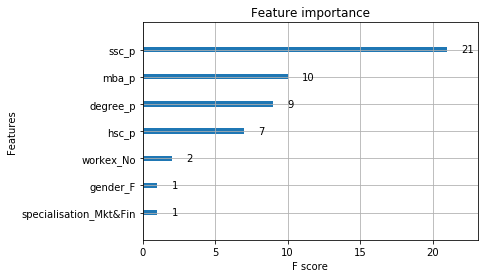

In [26]:
from xgboost import plot_importance

plot_importance(model)
plt.show()

# Cross Validation

In [27]:
# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=dtrain, params=params, nfold=3, num_boost_round=5, metrics="error", as_pandas=True, seed=123)


In [28]:
# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.086667         0.020548         0.186667        0.018856
1          0.073333         0.016997         0.206667        0.033993
2          0.060000         0.021602         0.186667        0.009428
3          0.050000         0.028284         0.193333        0.009428
4          0.050000         0.028284         0.180000        0.028284
0.82


# Grid Search

I'll try to find the best model parameter using grid search

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# parameters to optimize
params = {'eta' : [0.2,0.5,1],
         'max_depth' : [5,10,15,20],
         'learning_rate' : [0.1,0.5,1],
         'n_estimators' : [10,20,50,200]}

In [31]:
clf = GridSearchCV(model, params,scoring='roc_auc', n_jobs=10)
clf.fit(X_train,y_train)

C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=10,
             param_grid={'eta': [0.2, 0.5, 1], 'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [5, 10, 15, 20],
                         'n_esti

In [32]:
preds = clf.predict(X_test)

In [33]:
#New accuracy score is better 
print("the best accuracy score in test is: " + str(accuracy_score(y_test,preds)))

the best accuracy score in test is: 0.8461538461538461


In [34]:
confusion_matrix(y_test,preds)

array([[13,  8],
       [ 2, 42]], dtype=int64)

In [35]:
print("The best parameters found in the training proces are:")
print(clf.best_params_)
print("\nThe best score in the training process is: " + str(clf.best_score_))

The best parameters found in the training proces are:
{'eta': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

The best score in the training process is: 0.9228071895424838


the list of best predictors changed according to the folowing plot:
the model fund the following factors to be affecting the campus placement 


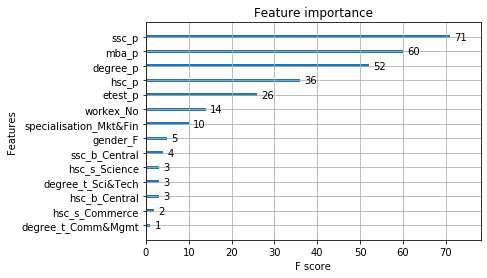

In [42]:
print("the list of best predictors changed according to the folowing plot:")
plot_importance(clf.best_estimator_)

print("the model fund the following factors to be affecting the campus placement ")
plt.show()



# Overfitting example

In [37]:
# parameters to optimize  (we added a new learninig rate value of 0.3)
params = {'eta' : [0.2,0.5,1],
         'max_depth' : [5,10,15,20],
         'learning_rate' : [0.2,0.3,0.5,1],
         'n_estimators' : [10,20,50,200]}

In [38]:
clf = GridSearchCV(model, params,scoring='roc_auc', n_jobs=10)
clf.fit(X_train,y_train)

C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hbkmi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=10, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=123, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=10,
             param_grid={'eta': [0.2, 0.5, 1],
                         'learning_rate': [0.2, 0.3, 0.5, 1],
                         'max_depth': [5, 10, 15, 20],
  

In [39]:
#New prediction
preds = clf.predict(X_test)

In [40]:
print("The best parameters found in the training proces are:")
print(clf.best_params_)
print("\nThe best score in the training process is: " + str(clf.best_score_))

The best parameters found in the training proces are:
{'eta': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}

The best score in the training process is: 0.9298471055088701


### Now the best parameter selected include a learning rate of 0.2,  this is because it performs better in the training set

In [41]:
#New accuracy score is better 
print("the best accuracy score in test is: " + str(accuracy_score(y_test,preds)))

the best accuracy score in test is: 0.8307692307692308


### But if we take a look at the test score it´s actually lower than the previous model. When a model performs better in the training set but worse in the test set, we can say the the model is overfiting